In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [128]:
df = sns.load_dataset('iris')

In [129]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [130]:
df.shape

(150, 5)

In [131]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [132]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


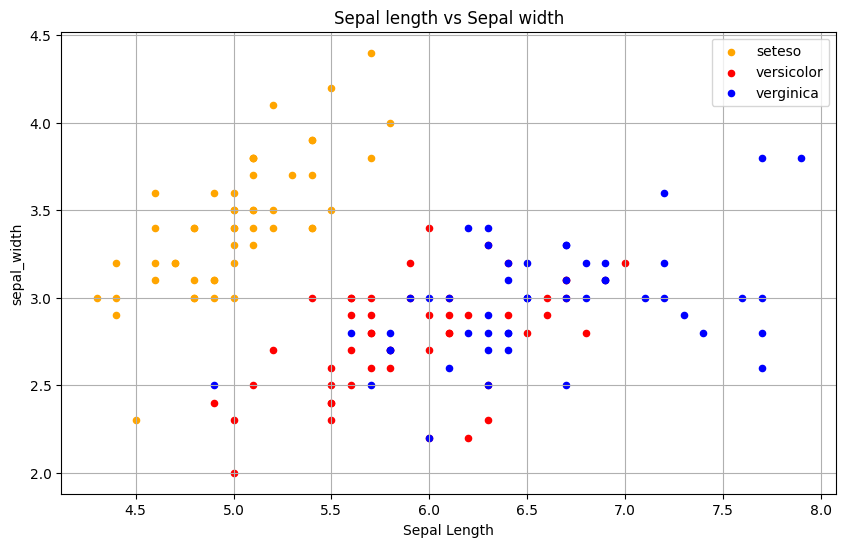

In [134]:
fig=df[df.species=='setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='orange', label='seteso')
df[df.species == 'versicolor'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='red', label='versicolor',ax=fig)
df[df.species == 'virginica'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='blue', label='verginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('sepal_width')
fig.set_title('Sepal length vs Sepal width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.grid()
plt.show()

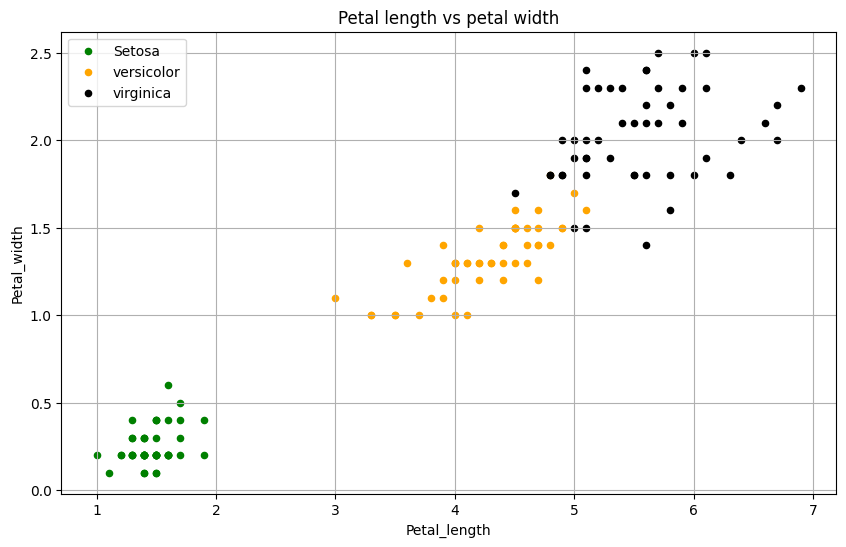

In [135]:
fig = df[df.species=='setosa'].plot(kind='scatter', x='petal_length', y='petal_width', color='green', label='Setosa')
df[df.species=='versicolor'].plot(kind='scatter', x='petal_length', y='petal_width', color='orange', label='versicolor', ax=fig)
df[df.species=='virginica'].plot(kind='scatter', x='petal_length', y='petal_width', label='virginica', color='black', ax=fig)

fig.set_xlabel('Petal_length')
fig.set_ylabel('Petal_width')
fig.set_title('Petal length vs petal width')
fig = plt.gcf()
plt.grid()
fig.set_size_inches(10,6)
plt.show()

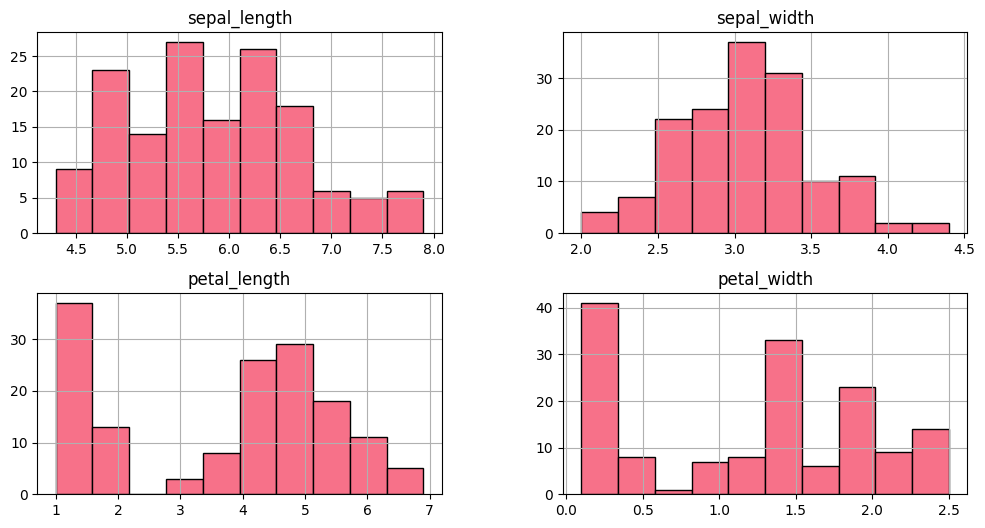

In [136]:
df.hist(edgecolor='black', bins=10)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

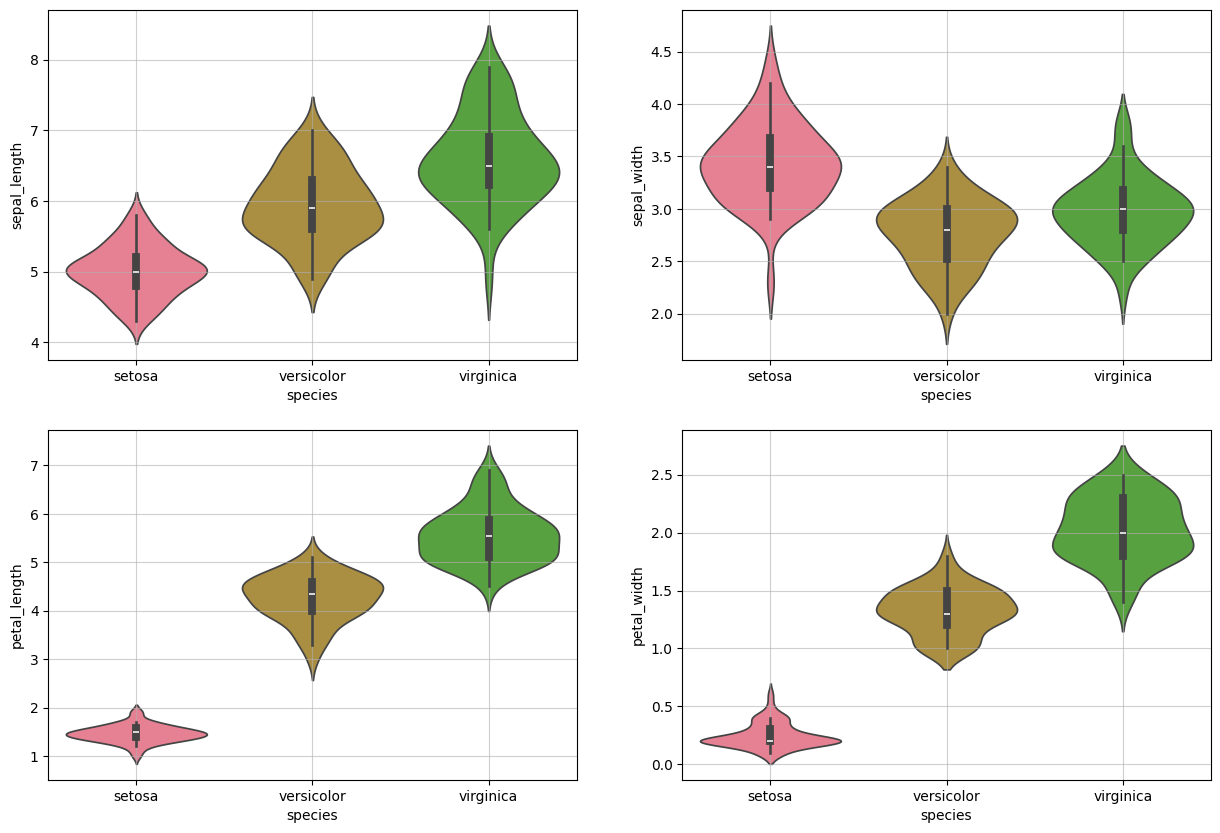

In [137]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=df, hue='species')
plt.grid(alpha=0.6)

plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=df, hue='species')
plt.grid(alpha=0.6)

plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', hue='species', data=df)
plt.grid(alpha=0.6)

plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width', data=df, hue='species')
plt.grid(alpha=0.6)

plt.show()

In [138]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

accuracy_score:  0.9666666666666667


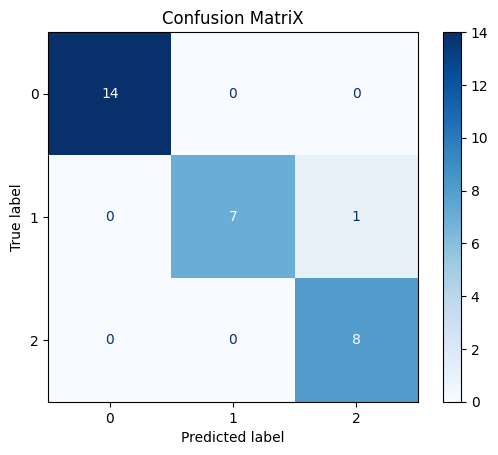

In [171]:
# without encoding the y (species)
lo = LogisticRegression(max_iter=200)
lo.fit(X_train, y_train)
y_pred = lo.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, y_pred))

# visualize confusion matriX
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion MatriX')
plt.show()

Accuracy score of train data: 0.975


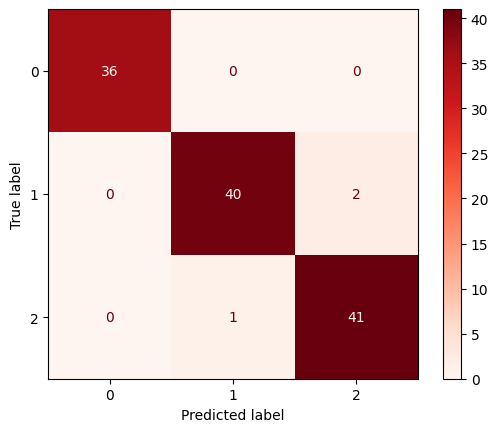

In [172]:
# train confusion matriX 
y_pred_train = lo.predict(X_train)
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train)).plot(cmap='Reds')
print('Accuracy score of train data:',accuracy_score(y_train, y_pred_train))

Accuracy score:  0.9666666666666667
Precision score:  0.9629629629629629
Recall score:  0.9583333333333334


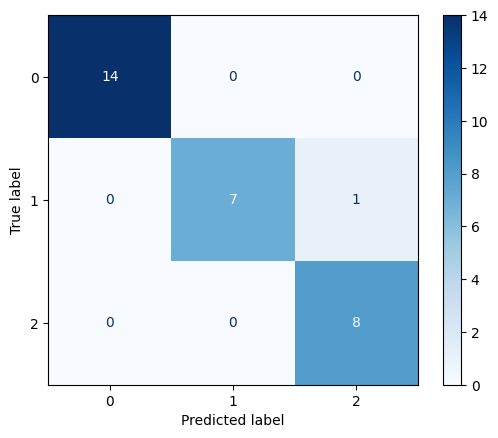

In [187]:
# encode the y (species)
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(sparse_output=False)
y_train_enc = oe.fit_transform(y_train.values.reshape(-1,1))
y_test_enc = oe.transform(y_test.values.reshape(-1,1))

lo.fit(X_train, y_train)

y_pred_enc = lo.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred_enc))
print('Precision score: ', precision_score(y_test, y_pred_enc, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred_enc, average='macro'))

conm = confusion_matrix(y_test, y_pred_enc)
disp = ConfusionMatrixDisplay(confusion_matrix=conm)
disp.plot(cmap='Blues')

In [188]:
# classification report of test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.88      0.93         8
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [207]:
result = lo.predict([[3.2, 1.2, 10.3, 5.4]])
result[0]

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'virginica'

In [201]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
